### Read Kv map from Figure 11 in Gregg and Carter (2011)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import scipy.misc as spy

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
image = spy.imread('Ascension_kv.png')

In [3]:
np.shape(image)

(1156, 1304, 4)

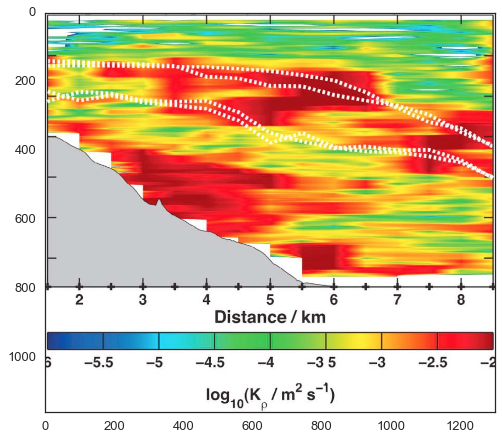

In [4]:
sns.set_style('white')
sns.set_context('talk')

plt.imshow(image)

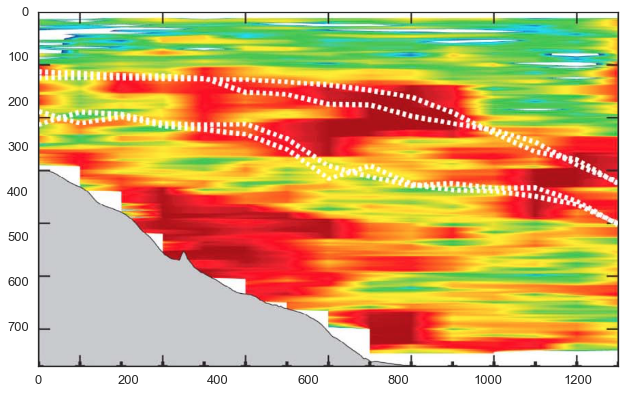

In [5]:
kvmap = image[7:793,6:1297,:]
plt.imshow(kvmap)

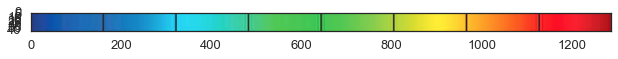

In [6]:
cbar = image[930:970,8:1296,:]
plt.imshow(cbar)

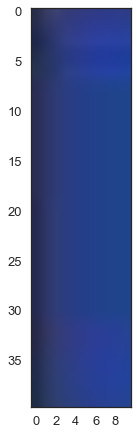

[[ 43  45  83 255]
 [ 46  53 103 255]
 [ 46  59 118 255]
 [ 43  61 129 255]
 [ 39  62 135 255]
 [ 36  63 138 255]
 [ 34  66 139 255]
 [ 33  67 140 255]
 [ 32  68 141 255]
 [ 32  68 140 255]]


In [7]:
maxCM = cbar[:,0:10,:]
plt.imshow(maxCM)
plt.show()

print(maxCM[15,0:10,:])

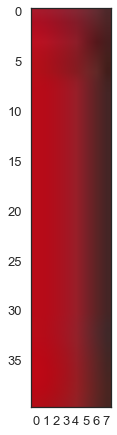

[[185  11  24 255]
 [182  11  25 255]
 [175  16  29 255]
 [165  22  35 255]
 [152  31  41 255]
 [121  33  40 255]
 [ 92  36  37 255]
 [ 69  37  37 255]]


In [8]:
minCM = cbar[:,1280:,:]
plt.imshow(minCM)
plt.show()

print(minCM[10,:,:])

Concatenated colorbar


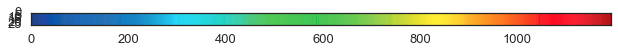

Original colorbar


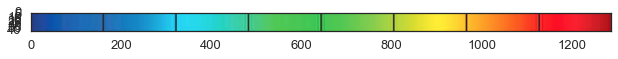

In [9]:
#get rid of black bars, pick the 8 sections individually
grad1 = cbar[5:30,5:155,:]
grad2 = cbar[5:30,170:315,:]
grad3 = cbar[5:30,325:470,:]
grad4 = cbar[5:30,490:640,:]
grad5 = cbar[5:30,650:800,:]
grad6 = cbar[5:30,810:960,:]
grad7 = cbar[5:30,970:1120,:]
grad8 = cbar[5:30,1130:-5,:]

gradient = np.concatenate((grad1, grad2, grad3, grad4, grad5, grad6, grad7, grad8), axis=1)
rgb_list = np.mean(gradient, axis=0)

print('Concatenated colorbar')
plt.imshow(gradient)
plt.show()
print('Original colorbar')
plt.imshow(cbar)
plt.show()



### Interpolate pixels into Gregg and Carter's original grid

The original grid has a resolution of 5 m x 0.5 km (vertical and along thalweg). I need to find the conversion pixels to meters in each direction to recreate that grid. I will split the image into cells of Z pixels by X pixels. But first, I need to mask all gray and all white (land and rim lines).

To build that mask i need to ask if red, green AND blue are a certain value ()

How many pixels in 1 "horizontal" km? Lines are about 6 pixels wide. There are about 184$\pm$3 pixels in 1 km

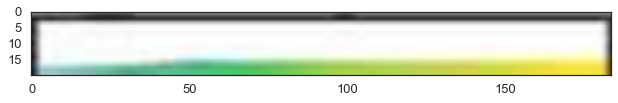

In [10]:
def_1km = kvmap[0:20,93:277,:]
plt.imshow(def_1km)

How many pixels in 100 "vertical" meters? There are 117$\pm$3 pixels per 100 m along the vertical axis.

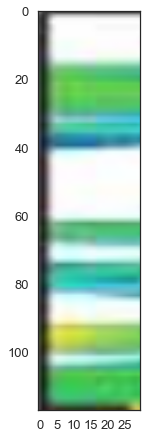

In [11]:
def_100m = kvmap[2:119,0:30,:]
plt.imshow(def_100m)

**Mask everything on the grey scale** 

Greys have all the same values for red, green and blue. So let's mask everything that has r==g and g==b.

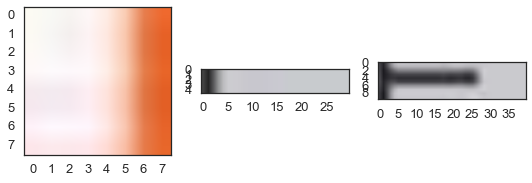

[[[252 251 243 255]
  [248 249 245 255]
  [247 244 241 255]
  [254 247 247 255]
  [255 236 228 255]
  [250 204 179 255]
  [231 126  78 255]
  [239 105  46 255]]

 [[252 250 244 255]
  [247 246 244 255]
  [244 239 238 255]
  [253 243 244 255]
  [255 232 224 255]
  [249 199 173 255]
  [225 120  71 255]
  [231  97  39 255]]

 [[254 250 246 255]
  [249 248 248 255]
  [248 242 243 255]
  [254 245 247 255]
  [255 233 226 255]
  [249 200 175 255]
  [225 120  71 255]
  [230  97  38 255]]

 [[255 249 249 255]
  [254 251 253 255]
  [254 249 252 255]
  [255 249 251 255]
  [255 238 231 255]
  [249 205 180 255]
  [229 126  75 255]
  [233 102  41 255]]

 [[245 234 238 255]
  [243 235 240 255]
  [245 233 239 255]
  [254 238 243 255]
  [255 227 220 255]
  [248 194 169 255]
  [224 118  68 255]
  [227  95  37 255]]

 [[246 232 239 255]
  [244 235 242 255]
  [246 234 241 255]
  [254 238 244 255]
  [255 226 220 255]
  [248 192 168 255]
  [224 118  69 255]
  [227  95  37 255]]

 [[255 243 250 255]
  [255 2

In [12]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(9,3))

white = kvmap[132:140,17:25,:]
grey = kvmap[730:735, 0:30,:]
black = kvmap[700:710, 0:40, :]

ax1.imshow(white)
ax2.imshow(grey)
ax3.imshow(black)

plt.show()

print(white)
#print(grey)
#print(black)

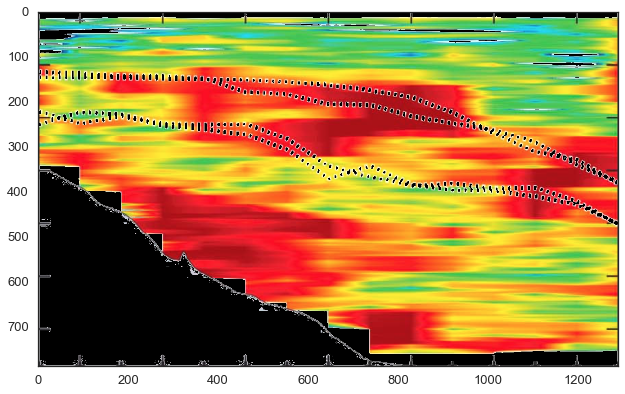

In [13]:
kvmap_masked = np.copy(kvmap)

for ii in range(np.shape(kvmap)[0]):
    for jj in range(np.shape(kvmap)[1]):
        # Mask greys
        if 190<=kvmap_masked[ii,jj,0]<=210 and 190<=kvmap_masked[ii,jj,1]<=210 and 190<=kvmap_masked[ii,jj,2]<=210: 
            kvmap_masked[ii,jj,0:3]=np.nan
        elif kvmap_masked[ii,jj,0]==67 and kvmap_masked[ii,jj,1]==67 and kvmap_masked[ii,jj,2]==67: 
            kvmap_masked[ii,jj,0:3]=np.nan
        elif kvmap_masked[ii,jj,0]==37 and kvmap_masked[ii,jj,1]==37 and kvmap_masked[ii,jj,2]==37: 
            kvmap_masked[ii,jj,0:3]=np.nan
        elif kvmap_masked[ii,jj,0]==87 and kvmap_masked[ii,jj,1]==87 and kvmap_masked[ii,jj,2]==87: 
            kvmap_masked[ii,jj,0:3]=np.nan
        # mask whites
        elif 220<=kvmap_masked[ii,jj,0]<=255 and 220<=kvmap_masked[ii,jj,1]<=255 and 220<=kvmap_masked[ii,jj,2]<=255: 
            kvmap_masked[ii,jj,0:3]=np.nan
        
        else:
            continue
        
plt.imshow(kvmap_masked)
plt.show()


In [14]:
size = np.shape(kvmap_masked)

kvmap_binned = np.empty((int(size[0]/6),int(size[1]/92),4))


In [15]:
kk = 0
mm = 0

for ii in range(int(size[0]/6)):
    mm = 0
    for jj in range(int(size[1]/92)):
        #print(ii,jj,kk,mm)
        kvmap_binned[ii,jj,0] = np.nanmean(kvmap_masked[kk:kk+6, mm:mm+92,0])
        #print(kvmap_binned[ii,jj,0])
        kvmap_binned[ii,jj,1] = np.nanmean(kvmap_masked[kk:kk+6, mm:mm+92,1])
        #print(kvmap_binned[ii,jj,1])
        kvmap_binned[ii,jj,2] = np.nanmean(kvmap_masked[kk:kk+6, mm:mm+92,2])
        #print(kvmap_binned[ii,jj,2])
        kvmap_binned[ii,jj,3] = np.nanmean(kvmap_masked[kk:kk+6, mm:mm+92,3])
        mm = mm + 92
    kk = kk + 6
        

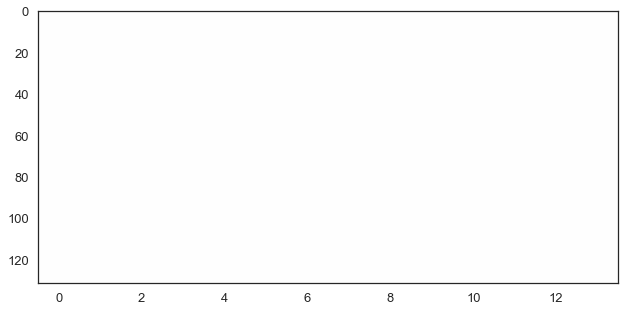

In [16]:
plt.imshow(kvmap_binned.astype(int),aspect=0.05)

In [17]:
# Jet colormap
r = np.zeros(256)
g = np.zeros(256)
b = np.zeros(256)


for ii in range(256):
    n = (4*ii)/256
    r[ii]=255*np.min([np.max([np.min([n-1.5,-n+4.5]),0]),1]);
    g[ii]=255*np.min([np.max([np.min([n-0.5,-n+3.5]),0]),1]);
    b[ii]=255*np.min([np.max([np.min([n+0.5,-n+2.5]),0]),1]);


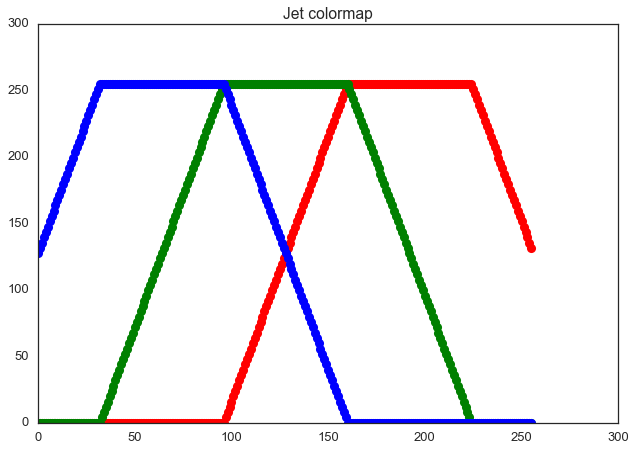

In [18]:
fig, ax = plt.subplots(1,1)
ax.plot(r, 'r-o')
ax.plot(g, 'g-o')
ax.plot(b, 'b-o')
ax.set_title('Jet colormap')

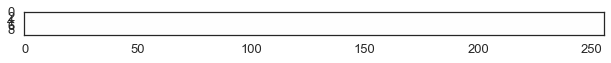

[  0   0 127 255]
[131   0   0 255]


In [19]:
# Made up image for jet colomap

jet = np.zeros((256,4))
jet[:,0] = r[:]
jet[:,1] = g[:]
jet[:,2] = b[:]
jet[:,3] = 255

jet = np.expand_dims(jet,axis=0) + np.zeros((10,256,4))
plt.imshow(jet.astype(int))
plt.show()

print(jet[0,0,:].astype(int))
print(jet[9,255,:].astype(int))

In [48]:
# define a colormap based on the colobar in the png, based on an answer in
# https://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values

import matplotlib.cm as cm
import scipy.cluster.vq as scv

def rgb2hex(r, g, b):
    '''r, g, b, are the red, green, blue values of a color. They should be integers between 0 and 255.
    This function returns the hexadecimal code for the color. '''
    return('#{:02x}{:02x}{:02x}'.format( r, g , b ))

def colormap2arr(arr,cmap):    
    # http://stackoverflow.com/questions/3720840/how-to-reverse-color-map-image-to-scalar-values/3722674#3722674
    vmin = -6.
    vmax = -2.
    resolution = 3000
    sample = np.linspace(vmin,vmax,resolution)

    # create code_book from sample
    cmap = LinearSegmentedColormap.from_list('Gregg2011', hex_list)
    norm = Normalize()
    gradient = cmap(norm(sample))
    
    #gradient=cmap(np.linspace(0.0,1.0,2000))
     
    # Reshape arr to something like (240*240, 4), all the 4-tuples in a long list...
    arr2=arr.reshape((arr.shape[0]*arr.shape[1],arr.shape[2]))

    # Use vector quantization to shift the values in arr2 to the nearest point in
    # the code book (gradient).
    code,dist=scv.vq(arr2,gradient)

    # code is an array of length arr2 (240*240), holding the code book index for
    # each observation. (arr2 are the "observations".)
    values=code.astype('float')

    # Reshape values back to (240,240)
    values=values.reshape(arr.shape[0],arr.shape[1])
    values=values[::-1]
    return values, dist



In [35]:
# Find rgb values of pixels in the image's colorbar to make a colormap

hex_list = []
for ii in range(len(rgb_list)):
    listy = hex_list.append(rgb2hex(rgb_list.astype(int)[ii,0],
                                       rgb_list.astype(int)[ii,1],
                                       rgb_list.astype(int)[ii,2]))

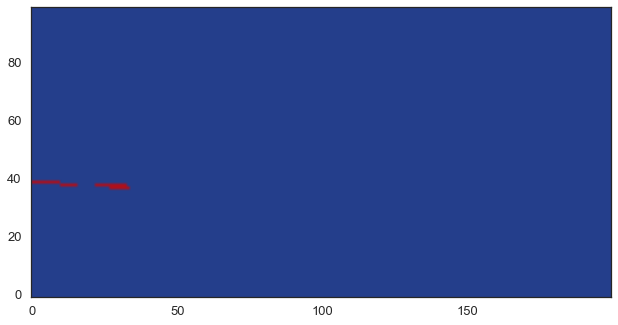

In [47]:
from matplotlib.colors import Normalize, LinearSegmentedColormap
from scipy.cluster.vq import vq

cmap = LinearSegmentedColormap.from_list('Gregg2011', hex_list)
values, dist=colormap2arr(kvmap[400:500,600:800,:],cmap)    

# Proof that it does not work:
plt.imshow(values,interpolation='bilinear', cmap=cmap, origin='lower')
plt.show()

In [49]:
x,y, = np.meshgrid(np.arange(50), np.arange(40))

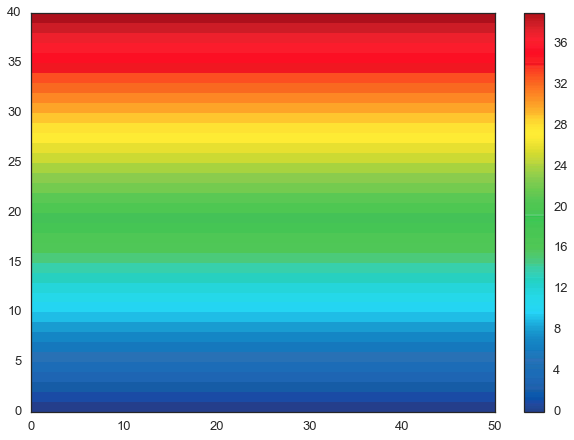

In [51]:
pc = plt.pcolor(y, cmap=cmap)
plt.colorbar(pc)